# Check VE and Yeo associations after DM

In [1]:
# Import modules and R
import numpy as np, pandas as pd
from plotnine import *
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append('../code')
from processing_helpers import *
from analysis_helpers import *
from gradientVersion import *
%R source("../code/Rplots.R");
%R source("../code/brainPlots.R");

Get gradients

In [3]:
dm_hcp_ds9 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_ds9')
pca_hcp_3d_ds8 = gradientVersion(approach='pca').fit('hcp_3donors_ds8')

New gradients version: method=dm, kernel=normalized_angle, data=hcp_ds9
New gradients version: method=pca, kernel=None, data=hcp_3donors_ds8


In [33]:
yeo_ve = (pd.read_csv("../data/vonEconomo_Yeo.csv")
          # .loc[lambda x: x['HCP'].str[:2] == 'L_']
          # .assign(HCP = lambda x: x['HCP'].str.replace('L_',''))
          .set_index('HCP')
         )
yeo_ve

,Yeo,vonEconomo,vonEconomo.colors,Yeo.colors,pos_all1,pos_all2,pos_all3
HCP,,,,,,,
L thalamus,8,8,#404040,#404040,10.9190,-9.4175,38.968
L caudate,8,8,#404040,#404040,11.9590,-32.7580,42.329
L putamen,8,8,#404040,#404040,22.9640,-26.7240,34.516
L pallidum,8,8,#404040,#404040,18.0830,-21.7790,33.619
L hippocampus,8,8,#404040,#404040,22.0760,-5.7355,23.134
...,...,...,...,...,...,...,...
R_STSva,7,2,#220ced,#FF6666,-49.1670,-26.5290,18.458
R_TE1m,7,2,#220ced,#FF6666,-59.2610,-14.8330,24.505
R_PI,4,3,#067a08,#FF00FF,-38.9840,-28.0600,23.495


In [99]:
Lobe_colors = {'Fr':"#377EB8", 'Ins':"#E41A1C", 'Occ':"#4DAF4A", 'Par':"#984EA3", 'Temp':"#FF7F00"}
vonEconomo_labels = {1:'motor',2:'association',3:'association',4:'sensory',5:'sensory',6:'limbic',7:'insula'}
Yeo_labels = {1:'visual',2:'somatomotor',3:'dorsal attention',4:'ventral attention',5:'limbic',6:'frontoparietal',7:'default mode'}

version = dm_hcp_ds9
scores = version.clean_scores()

df_ve_yeo = (
 fetch_hcp()['info'].set_index('id')[['Lobe','x-cog','y-cog','z-cog']]
 .rename({'x-cog':'x','y-cog':'y','z-cog':'z'},axis=1)
 .loc[:180]
 .join(version.clean_scores())
 .assign(L_label = lambda x: ['L_' + l for l in x['label'].astype('str')])
 .join(yeo_ve, on='L_label')
 .assign(Lobecolors = lambda x: x['Lobe'].map(Lobe_colors))
 .assign(vonEconomo_labels = lambda x: x['vonEconomo'].map(vonEconomo_labels))
 .assign(Yeo_labels = lambda x: x['Yeo'].map(Yeo_labels))
)
df_ve_yeo

,Lobe,x,y,z,G1,G2,G3,label,L_label,Yeo,vonEconomo,vonEconomo.colors,Yeo.colors,pos_all1,pos_all2,pos_all3,Lobecolors,vonEconomo_labels,Yeo_labels
id,,,,,,,,,,,,,,,,,,,
1,Occ,100.491589,41.138901,71.637040,1.936037,-2.320721,1.490553,V1,L_V1,1.0,5.0,#fffb00,#660066,11.2100,49.8160,35.575,#4DAF4A,sensory,visual
2,Occ,132.416667,58.901786,82.059524,1.654030,-1.123124,0.843281,MST,L_MST,1.0,4.0,#f59505,#660066,36.2500,34.0110,37.570,#4DAF4A,sensory,visual
3,Occ,104.543112,44.481665,103.916749,1.011125,0.042274,0.224965,V6,L_V6,1.0,4.0,#f59505,#660066,10.0960,35.7500,55.243,#4DAF4A,sensory,visual
4,Occ,102.236656,44.064791,74.401125,1.907394,-2.052782,1.128586,V2,L_V2,1.0,4.0,#f59505,#660066,11.1790,46.8900,36.613,#4DAF4A,sensory,visual
5,Occ,107.926111,40.632159,76.961153,1.897752,-2.077470,0.851847,V3,L_V3,1.0,4.0,#f59505,#660066,14.5800,47.8790,37.700,#4DAF4A,sensory,visual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Temp,142.689243,118.134462,52.832669,-1.086901,-0.544289,-0.975345,STSva,L_STSva,7.0,2.0,#220ced,#FF6666,47.7880,-20.2020,23.128,#FF7F00,association,default mode
177,Temp,155.554922,101.395287,54.901178,-0.966056,-0.289274,-1.215077,TE1m,L_TE1m,7.0,2.0,#220ced,#FF6666,56.7780,-7.0496,23.176,#FF7F00,association,default mode
178,Temp,134.650549,124.293407,56.102198,-1.416398,-1.286164,-0.284032,PI,L_PI,4.0,3.0,#067a08,#FF00FF,39.7870,-28.6810,22.045,#FF7F00,association,ventral attention


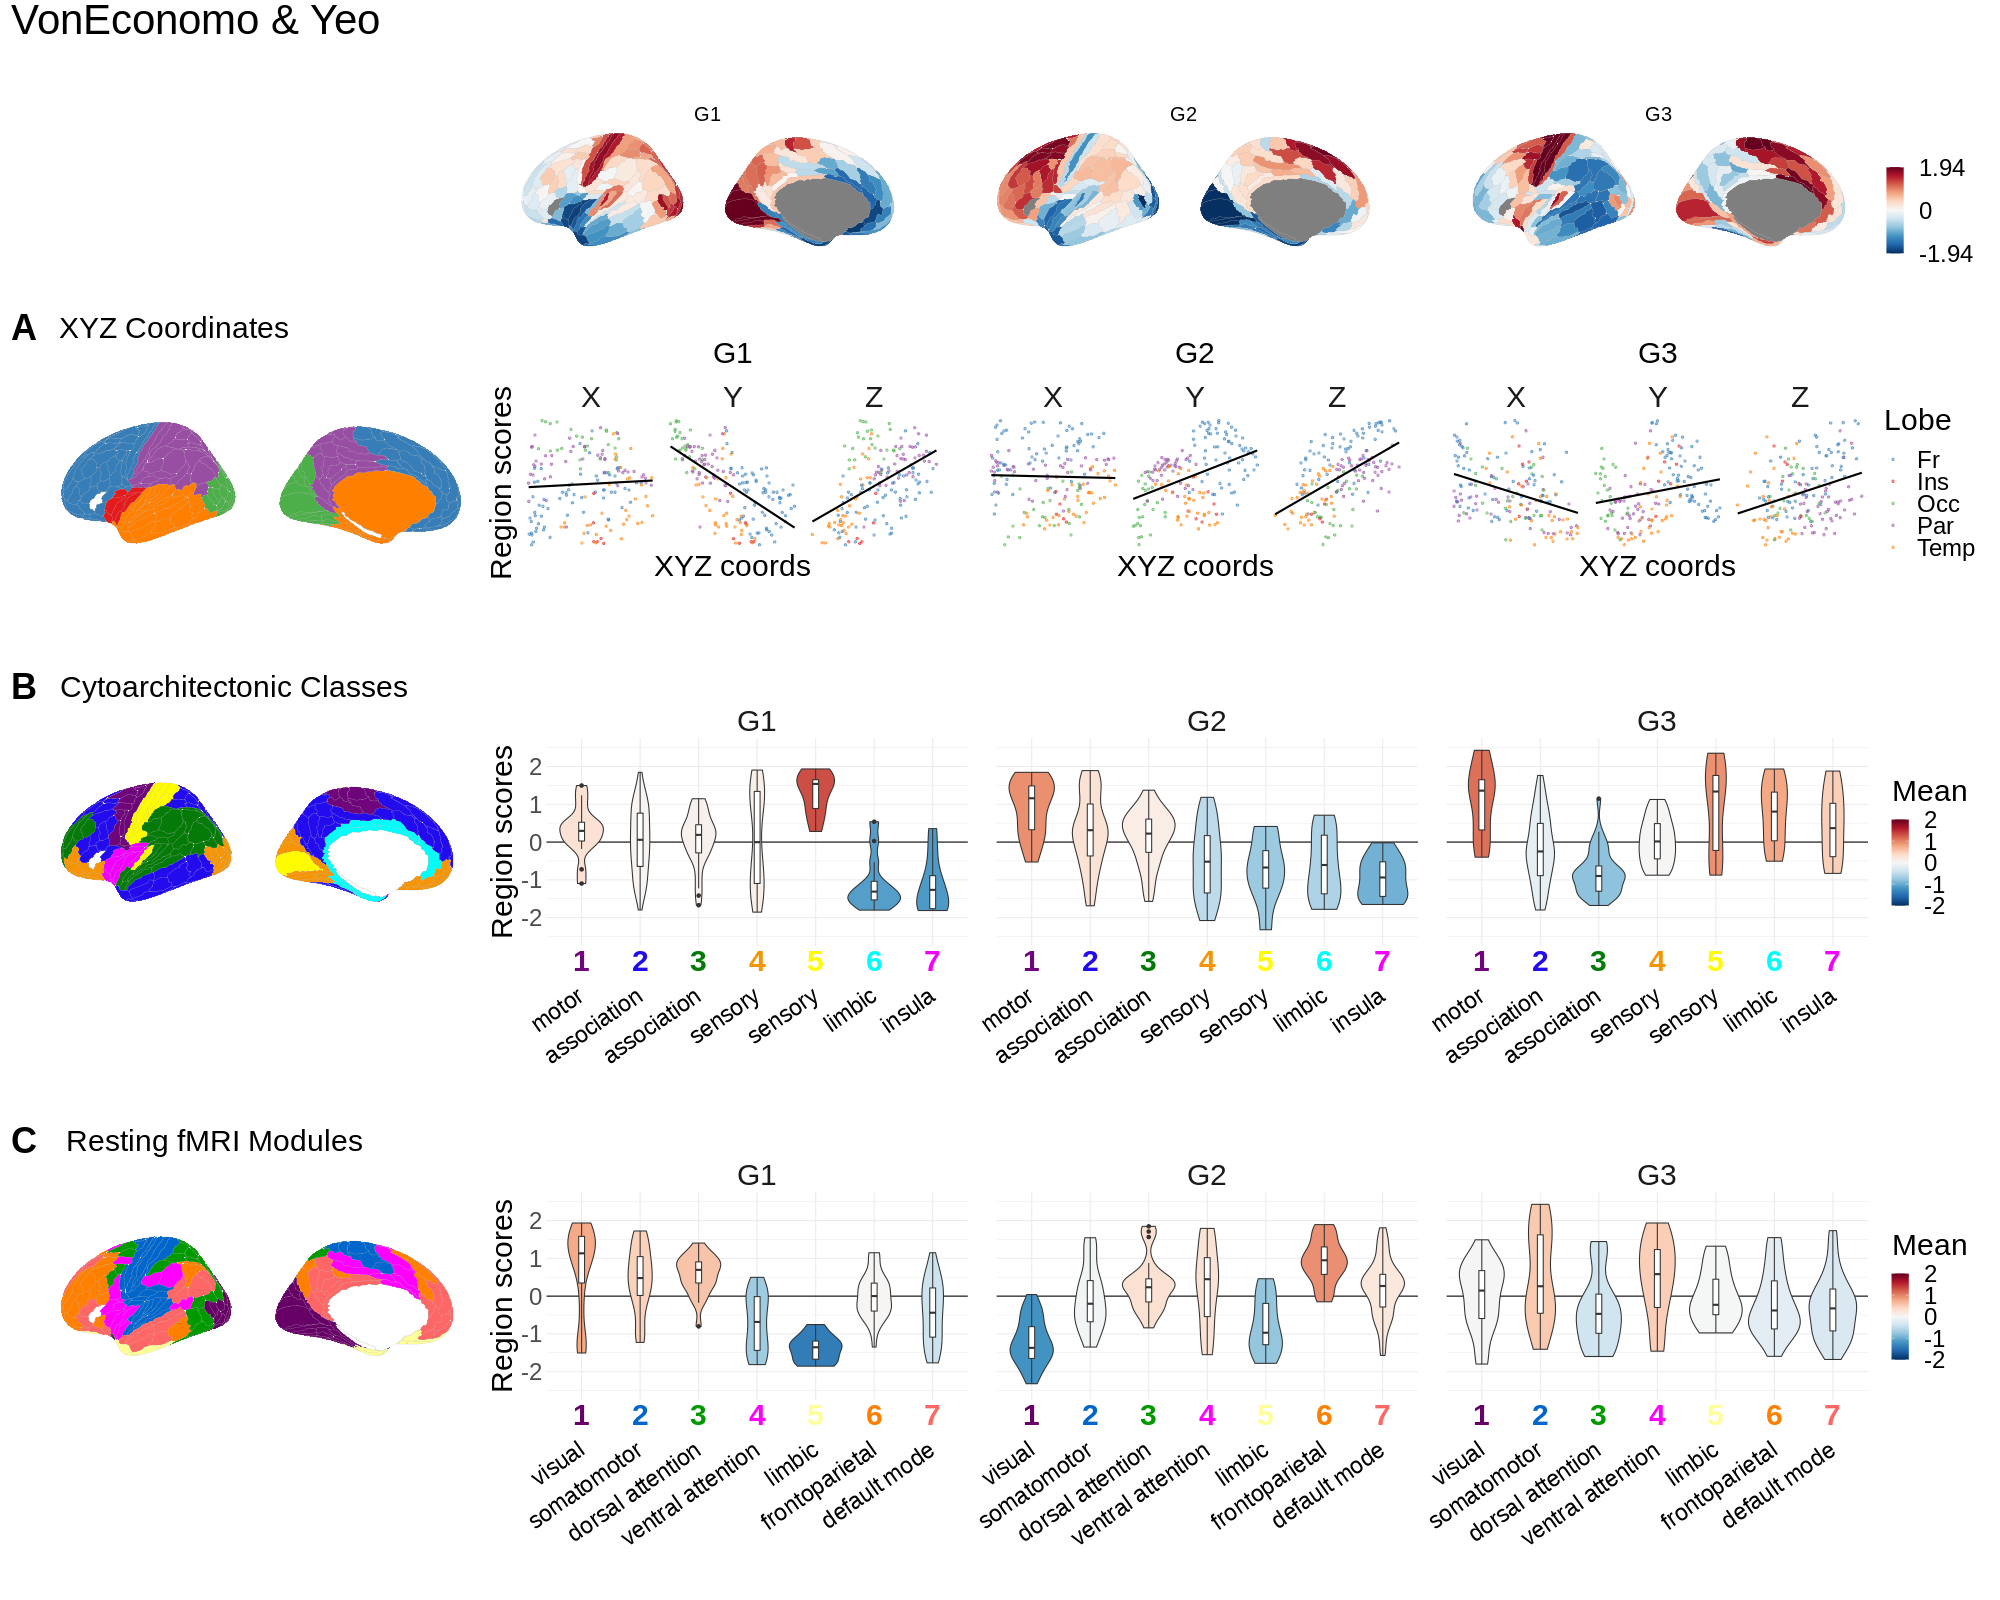

In [101]:
%%R -w 2000 -h 1600 -i df_ve_yeo -i scores

source("../code/Rplots.R")
Lobe_colors = c('#377EB8', '#E41A1C', '#4DAF4A', '#984EA3', '#FF7F00')


g0 <- plot_hcp_classes(df_ve_yeo, classes=Lobe, classcolors=Lobecolors) + ggtitle('XYZ Coordinates') + theme(plot.title=element_text(size=30, hjust=0.1))
g01 <- plot_xyz(df_ve_yeo, G1, 'G1', colors=Lobe_colors)
g02 <- plot_xyz(df_ve_yeo, G2, 'G2', colors=Lobe_colors)
g03 <- plot_xyz(df_ve_yeo, G3, 'G3', colors=Lobe_colors)

g1 <- plot_hcp_classes(df_ve_yeo, vonEconomo, vonEconomo.colors) + ggtitle('Cytoarchitectonic Classes') + theme(plot.title=element_text(size=30, hjust=0.25))
g1x <- plot_violins(df_ve_yeo, vonEconomo, vonEconomo.colors, vonEconomo_labels)
g2 <- plot_hcp_classes(df_ve_yeo, Yeo, Yeo.colors) + ggtitle('Resting fMRI Modules') + theme(plot.title=element_text(size=30, hjust=0.2))
g2x <- plot_violins(df_ve_yeo, Yeo, Yeo.colors, Yeo_labels)

source("../code/brainPlots.R")
g5 <- plot_hcp_wide(scores)

(
    ((plot_spacer() | g5 + plot_layout(tag_level='new')) + plot_layout(widths=c(1,3)) ) /     
    ((g0 | ((g01|g02|g03) & plot_layout(tag_level='new'))) + plot_layout(widths=c(1,3),guides='collect') ) /
    ((g1 | g1x + plot_layout(tag_level='new')) + plot_layout(widths=c(1,3)) ) / 
    ((g2 | g2x + plot_layout(tag_level='new')) + plot_layout(widths=c(1,3)) ) /
    plot_spacer() & theme(text=element_text(size=30), strip.text=element_text(size=30))
) + plot_layout(heights=c(3,4,4,4,1)) +
    plot_annotation(tag_levels='A',title='VonEconomo & Yeo',
                theme=theme(plot.title=element_text(size=42, hjust=0))) & theme(plot.tag=element_text(size=36, face='bold', vjust=-3.4))